In [2]:
import pandas as pd
import numpy as np


In [3]:
spam_df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")
spam_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1410,ham,Pls speak to that customer machan.,NaN,NaN,NaN
3589,ham,I am in escape theatre now. . Going to watch K...,NaN,NaN,NaN
4089,spam,We tried to call you re your reply to our sms ...,NaN,NaN,NaN
937,ham,K:)k.are you in college?,NaN,NaN,NaN
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",NaN,NaN,NaN


In [4]:
spam_df.shape

(5572, 5)

## Data Cleaning

In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam_df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
spam_df.head(2)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
spam_df['Target'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
spam_df['Target']=encoder.fit_transform(spam_df['Target'])

In [12]:
spam_df.head(2)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [13]:
spam_df.isna().sum()

Target    0
Text      0
dtype: int64

In [14]:
spam_df.duplicated().sum()
# 403 duplicate values are present hence dropping them

403

In [15]:
spam_df.drop_duplicates(keep='first',inplace=True)

In [16]:
spam_df.duplicated().sum()

0

In [17]:
spam_df.shape

(5169, 2)

## EDA

In [18]:
# Checking how many are spam and how many are ham
spam_df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

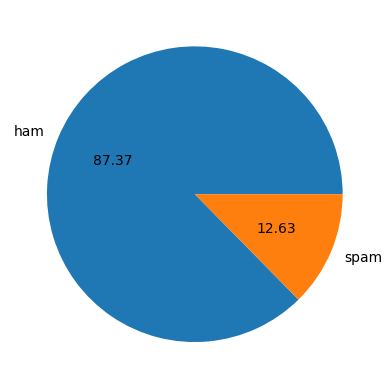

In [19]:
import matplotlib.pyplot as plt
plt.pie(spam_df['Target'].value_counts(),labels=['ham','spam'],autopct="%.2f")
plt.show()

In [20]:
# data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
spam_df['no_characters']=spam_df['Text'].apply(len)

In [24]:
spam_df.head()

,Target,Text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
spam_df['no_words']=spam_df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
# nltk.word_tokenize gives list  of words used, len of it gives number of words present
                      

In [26]:
spam_df.head(2)

,Target,Text,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [27]:
spam_df['no_sentences']=spam_df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
spam_df.head()

,Target,Text,no_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
spam_df[['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
spam_df[spam_df['Target']==0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
spam_df[spam_df['Target']==1][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 624.8 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import seaborn as sns

(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

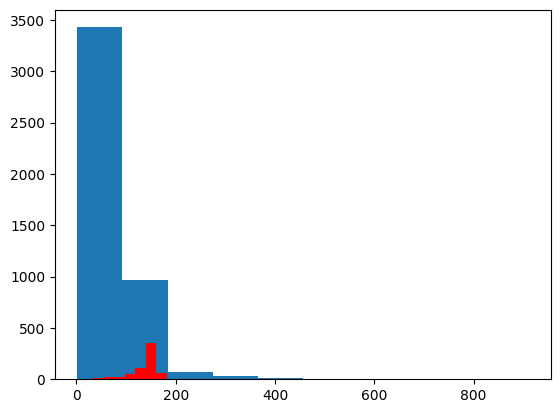

In [33]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(12,6))
plt.hist(spam_df[spam_df['Target']==0]['no_characters'])
# plt.figure(figsize=(12,6))
plt.hist(spam_df[spam_df['Target']==1]['no_characters'],color='red')

<Axes: >

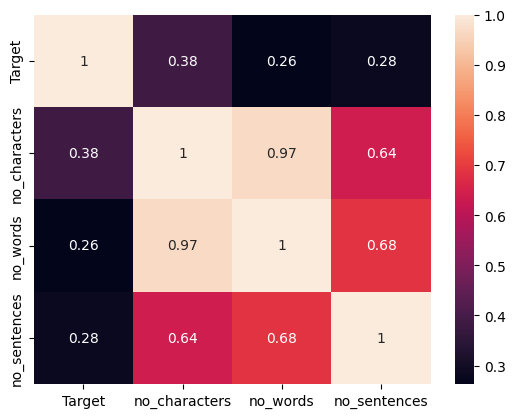

In [34]:
# sns.heatmap(spam_df.corr(),annot=True)
sns.heatmap(spam_df.drop(columns=['Text']).corr(),annot=True)

## Data Preprocessing
- Lower Case
- Tokenization
- Removing Special Characters
- Removing stop words and punctuation
- Stemming

In [36]:

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    transformed_text=[]
    for word in text:
        if word.isalnum():
            transformed_text.append(word)
    text=transformed_text[:]
    transformed_text.clear()
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            transformed_text.append(word)
    text=transformed_text[:]
    transformed_text.clear()
    for word in text:
        transformed_text.append(ps.stem(word))
    return " ".join(transformed_text)


In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
spam_df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
spam_df['transformed_text']=spam_df['Text'].apply(transform_text)

In [42]:
spam_df.head()

,Target,Text,no_characters,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
spam_words=[]
for msg in spam_df[spam_df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [61]:
len(spam_words)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


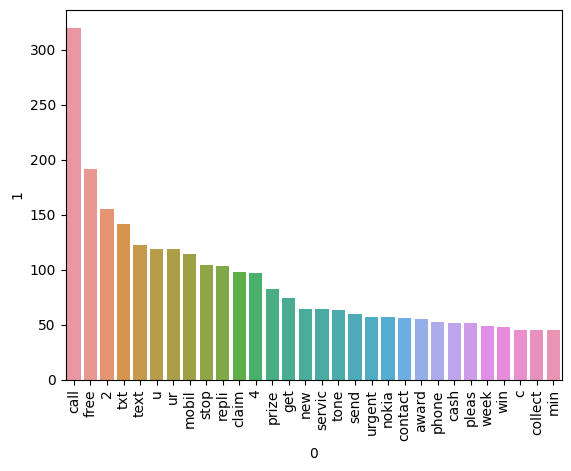

In [67]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()